In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import math

In [14]:
data = pd.read_csv("308.csv", names=["P", "U"])

In [15]:
sigma_P = 0.05
sigma_U = 1
U_corr = 10
P_corr = 1
data["P"] = data["P"] - P_corr
data["U"] = data["U"] - U_corr
data["T"] = round(data["U"] / 41.6, 2)
sigma_T = sigma_U / 41.6
X = data["P"].values
sigma_X = sigma_P
Y = data["T"].values
sigma_Y = sigma_T

In [16]:
A = np.vstack([X, np.ones(len(X))]).T
k, b = np.linalg.lstsq(A, Y, rcond=None)[0]
#sigma_k = math.sqrt((Y.std() - Y.mean()**2 ) / (X.std() - X.mean()**2 ) - b**2 ) / math.sqrt(len(X))
#eps_k = sigma_k / k
#sigma_b = sigma_k * math.sqrt(X.std() / X.mean() - X.mean()**2 )

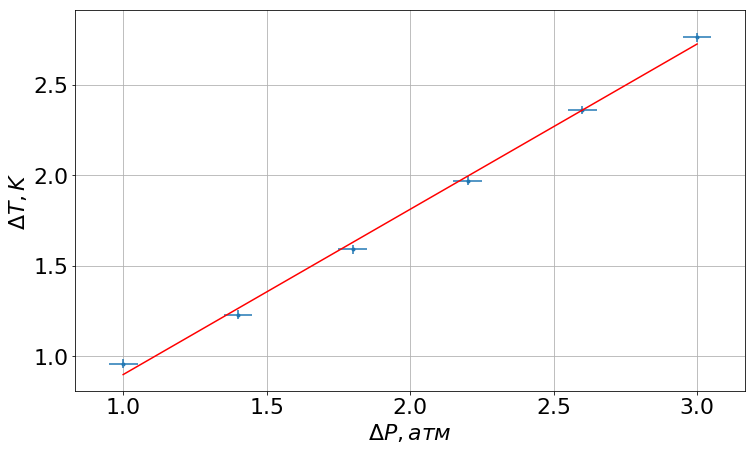

In [17]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()
plt.scatter(X, Y, marker=".")
plt.errorbar(X, Y, xerr=sigma_X, yerr=sigma_Y, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min()) / len(Y)
ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() - delta_y/2), Y.max() + delta_y/2)
plt.xlabel("$\Delta P, атм$")
plt.ylabel("$\Delta T, K$")
plt.plot(X, (k*X + b), 'r', label='Fitted line')
plt.grid(True)
plt.savefig("../308.png")

In [18]:
k

0.9121428571428571

In [19]:
b

-0.012619047619048045

In [10]:
data

,P,U,T
0,4.0,115,2.76
1,3.6,98,2.36
2,3.2,82,1.97
3,2.8,66,1.59
4,2.4,51,1.23
5,2.0,40,0.96


In [11]:
data.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &    P &    U &     T \\\\\n\\midrule\n0 &  4.0 &  115 &  2.76 \\\\\n1 &  3.6 &   98 &  2.36 \\\\\n2 &  3.2 &   82 &  1.97 \\\\\n3 &  2.8 &   66 &  1.59 \\\\\n4 &  2.4 &   51 &  1.23 \\\\\n5 &  2.0 &   40 &  0.96 \\\\\n\\bottomrule\n\\end{tabular}\n'